# Lesson 4 Assignment - Autodetection of Breast Cancer

## Author - Yulia Zubova

### Background
The <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Breast Cancer Wisconsin (Diagnostic) Data set</a> contains donated data.
These data were obtained from the University of Wisconsin Hospitals, Madison. Donors:
1. Dr. William H. Wolberg, General Surgery Dept.
2. W. Nick Street, Computer Sciences Dept.
3. Olvi L. Mangasarian, Computer Sciences Dept.

They contain the simplified and normalized attributes used to detect breast cancer. Your task is to build
a decision tree classifier that would be able to detect, based on the attributes below, whether a tumor is
benign or malignant.

Attributes:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitosis
11. Class (4 for malignant, 2 for benign)




## Tasks
Using the provided WI_Breast_Cancer.csv file, build an experiment using a decision tree.

Answer the following questions:
1. Test both entropy and the gini coefficient. Which performs better and why?
2. What are the best hyperparameter settings for both?
3. Visualize both models and see which feature is selected for each criterion. Are they same for
both? Why or why not?
4. Determine the AUC for the best model you can achieve. What are the precision and recal values
and which might be the one you want to maximize?
5. What are the implications of using this type of machine learning algorithm for breast cancer
analysis?


In [4]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WI_Breast_Cancer.csv"
colnames = ['Sample_code' , 'Class', 'Clump_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_adhes', 
             'Single_cell_sz', 'Bare_Nucl', 'Bland_Chr', 'Norm_Nucl', 'Mitosis']

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import re
import pandas_profiling
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
import os
from IPython.display import Image

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [34]:
#Load dataset
cancer_df = pd.read_csv(URL, header = None, names = colnames)

In [168]:
cancer_df.head()

,Sample_code,Class,Clump_thick,Uni_cell_sz,Uni_cell_shp,Marg_adhes,Single_cell_sz,Bare_Nucl,Bland_Chr,Norm_Nucl,Mitosis
0,1000025,2,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,1002945,2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,1015425,2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,1016277,2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,1017023,2,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1


In [35]:
cancer_df.loc[cancer_df['Class'] == '4' ,'Tumor_Class'] = 1
cancer_df.loc[cancer_df['Class'] == '2','Tumor_Class'] = 0
#cancer_df['Tumor_Class'] = cancer_df['Class']
cancer_df = cancer_df.drop(['Class'], axis = 1)

In [36]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 11 columns):
Sample_code       709 non-null object
Clump_thick       702 non-null float64
Uni_cell_sz       701 non-null float64
Uni_cell_shp      701 non-null float64
Marg_adhes        701 non-null float64
Single_cell_sz    701 non-null float64
Bare_Nucl         701 non-null float64
Bland_Chr         701 non-null float64
Norm_Nucl         701 non-null float64
Mitosis           701 non-null object
Tumor_Class       701 non-null float64
dtypes: float64(9), object(2)
memory usage: 61.0+ KB


In [171]:
cancer_df['Mitosis'].value_counts()

1                                    579
2                                     35
3                                     33
10                                    14
4                                     12
7                                      9
8                                      8
5                                      6
6                                      3
3) <-----Reappears in Group 8 as:      1
3                                      1
Name: Mitosis, dtype: int64

In [37]:
cancer_df = cancer_df.drop(['Sample_code'], axis = 1)

In [38]:
cancer_df = cancer_df.dropna()

In [9]:
pandas_profiling.ProfileReport(cancer_df)

Number of variables,11
Number of observations,701
Total Missing (%),0.0%
Total size in memory,60.3 KiB
Average record size in memory,88.1 B
Numeric,8
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [39]:
cancer_df['Mitosis'].value_counts()

1                                    579
2                                     35
3                                     33
10                                    14
4                                     12
7                                      9
8                                      8
5                                      6
6                                      3
3) <-----Reappears in Group 8 as:      1
3                                      1
Name: Mitosis, dtype: int64

In [153]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 708
Data columns (total 10 columns):
Clump_thick       701 non-null float64
Uni_cell_sz       701 non-null float64
Uni_cell_shp      701 non-null float64
Marg_adhes        701 non-null float64
Single_cell_sz    701 non-null float64
Bare_Nucl         701 non-null float64
Bland_Chr         701 non-null float64
Norm_Nucl         701 non-null float64
Mitosis           701 non-null object
Tumor_Class       701 non-null int32
dtypes: float64(8), int32(1), object(1)
memory usage: 57.5+ KB


In [40]:
#Exclude rows that contain non-numeric symbols in column "Mitosis"
cancer_df = cancer_df[~cancer_df.Mitosis.str.contains(r'\D')]

In [41]:
cancer_df['Mitosis'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitosis, dtype: int64

In [42]:
cancer_df['Mitosis'] = cancer_df['Mitosis'].astype(int)

In [43]:
X = cancer_df.iloc[:, 0:-1]
Y = cancer_df.iloc[:, -1] # Load target into Y DF

In [44]:
mitos_dummies = pd.get_dummies(X['Mitosis'], prefix = 'Mitosis')
X = pd.concat([X, mitos_dummies], axis=1)

In [45]:
X = X.drop(['Mitosis'], axis = 1)

In [46]:
np.random.seed(101)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

In [48]:
clf = DecisionTreeClassifier(random_state = 0)

In [49]:
#Generation grid
clf.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [57]:
parameters_grid_ent = {
  'criterion': ['entropy'] ,
  'max_depth': [3,4,5,6,7],
  'min_samples_leaf' : [2,3,4,5,6,7,8],
  'min_samples_split' : [2,3,4,5,6,7,8],
}

parameters_grid_gini = {
  'criterion': ['gini'] ,
  'max_depth': [3,4,5,6,7],
  'min_samples_leaf' : [2,3,4,5,6,7,8],
  'min_samples_split' : [2,3,4,5,6,7,8],
}

In [22]:
cv = cross_validation.KFold(len(X_train) , n_folds = 5 , random_state=7)

In [58]:
#Grid search
grid_cv_ent = grid_search.GridSearchCV(clf, parameters_grid_ent, scoring = 'accuracy', cv = cv )

In [59]:
#Grid search
grid_cv_gini = grid_search.GridSearchCV(clf, parameters_grid_gini, scoring = 'accuracy', cv = cv )

In [60]:
grid_cv_ent.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=629, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [61]:
grid_cv_gini.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=629, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [62]:
grid_cv_ent.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [63]:
grid_cv_gini.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [68]:
grid_cv.grid_scores_[0:200]

[mean: 0.95390, std: 0.02237, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2},
 mean: 0.95390, std: 0.02237, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3},
 mean: 0.95390, std: 0.02237, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 4},
 mean: 0.95390, std: 0.02237, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5},
 mean: 0.95390, std: 0.02237, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6},
 mean: 0.95548, std: 0.02305, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 7},
 mean: 0.95548, std: 0.02305, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 8},
 mean: 0.95390, std: 0.02180, params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samp

In [70]:
# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf= 5, min_samples_split=2).fit(X_train, np.ravel(y_train)) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 2
model_gini = DecisionTreeClassifier(max_depth = 6, min_samples_leaf= 5, min_samples_split = 2).fit(X_train, np.ravel(y_train))
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time. 

In [64]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 708
Data columns (total 9 columns):
Clump_thick       701 non-null float64
Uni_cell_sz       701 non-null float64
Uni_cell_shp      701 non-null float64
Marg_adhes        701 non-null float64
Single_cell_sz    701 non-null float64
Bare_Nucl         701 non-null float64
Bland_Chr         701 non-null float64
Norm_Nucl         701 non-null float64
Tumor_Class       701 non-null object
dtypes: float64(8), object(1)
memory usage: 54.8+ KB


In [71]:
print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 90.0%
Gini accuracy is : 94.28571428571428%


In [72]:
print("AUC Entropy: {:.3f}".format(roc_auc_score(y_test, y_ent_pred)))
print("AUC Gini: {:.3f}".format(roc_auc_score(y_test, y_gini_pred)))
#roc_auc_score(y_test, y_ent_pred)

AUC Entropy: 0.864
AUC Gini: 0.927


In [55]:
pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred)
)

,0,1
0,44,2
1,4,20


In [243]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
dotfile = open("dtree1.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile, feature_names = X.columns)
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree1.dot -o dtree1.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

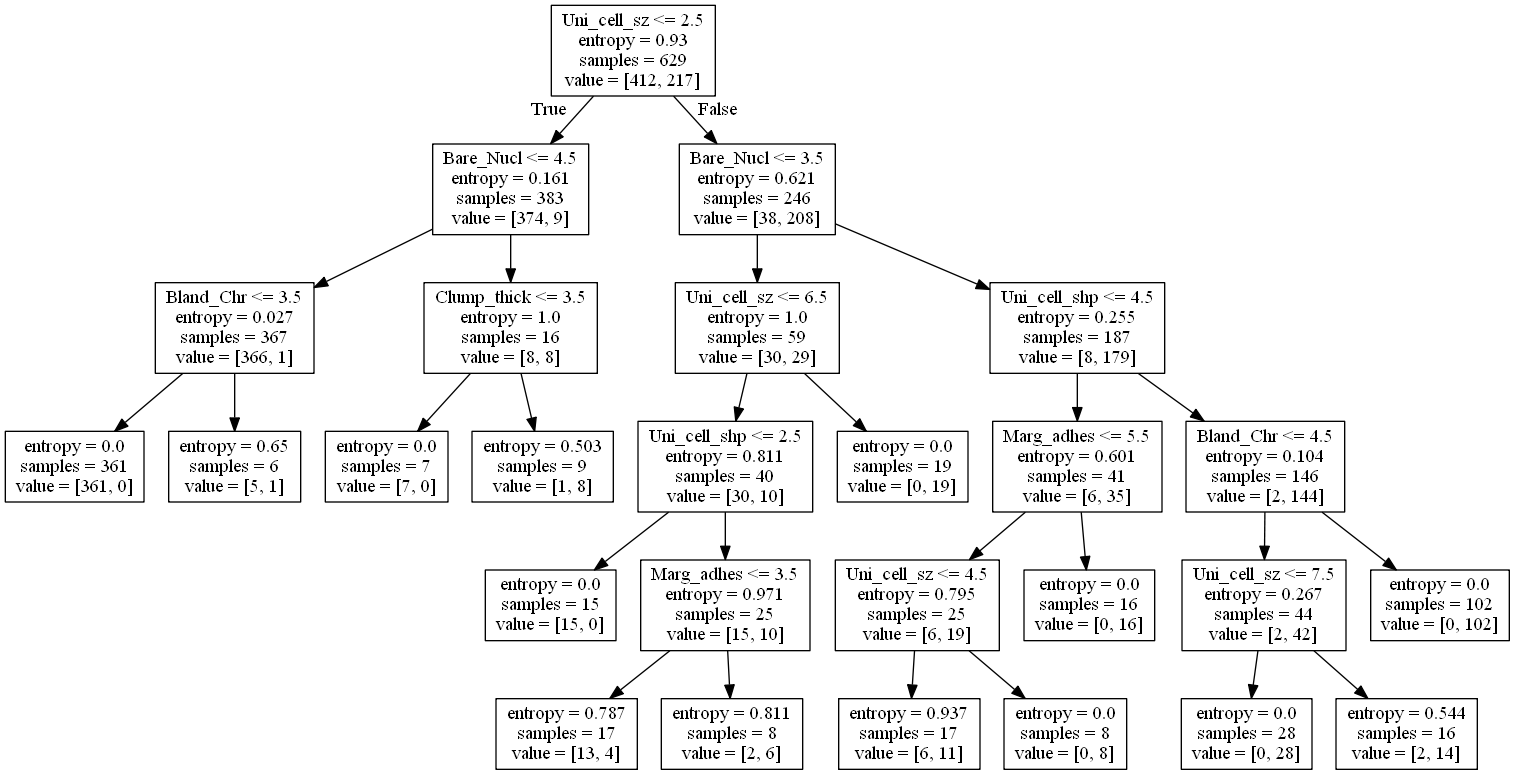

In [244]:
# show the png
Image(filename='dtree1.png', width=1000, height=1000) 

In [245]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = X.columns)
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

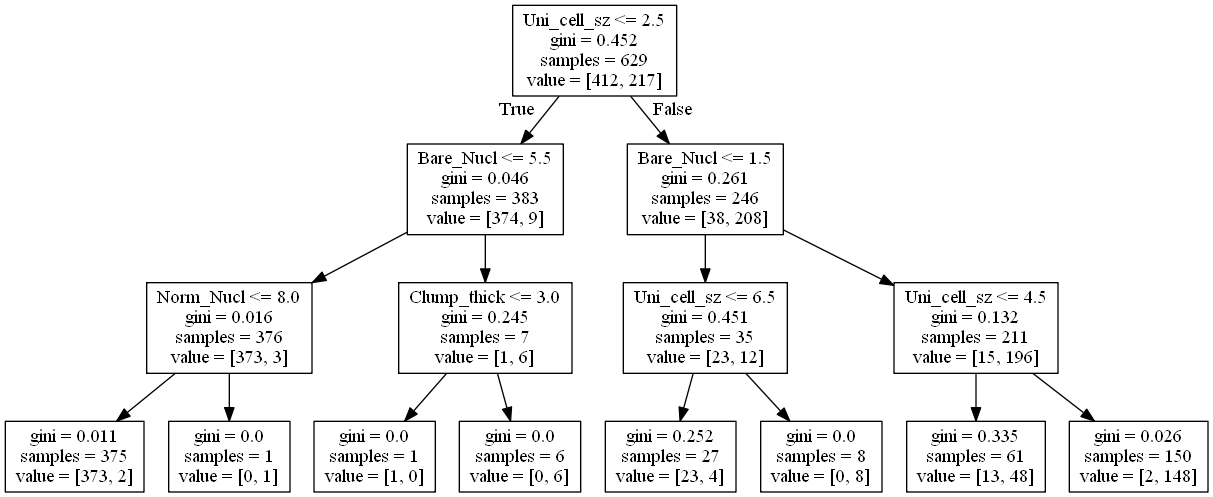

In [246]:
# show the png
Image(filename='dtree.png', width=1000, height=1000) 